In [1]:
# Load data and Library

import os
import json
import numpy as np
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

datas = [
    'data/data_fold/data_0/dailydialog_train.json',
    'data/data_fold/data_0/dailydialog_valid.json',
    'data/data_fold/data_0/dailydialog_test.json',
]

# # Another folds
# fold_ = 1
# datas = [
#     f'data/data_fold/data_{fold_}/data_{fold_}_train.json',
#     f'data/data_fold/data_{fold_}/data_{fold_}_valid.json',
#     f'data/data_fold/data_{fold_}/data_{fold_}_test.json'
# ]


# # Entire data
# datas = [
#     'data/data_fold_test_IEMOCAP/data_0/data_0_train.json',
#     'data/data_fold_test_IEMOCAP/data_0/data_0_valid.json',
#     'data/data_fold_test_IEMOCAP/data_0/data_0_test.json'
# ]



/home/hjl8708/anaconda3/envs/prgmoe/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-07 12:23:22.327270: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
sum_dailog = 0
sum_utterance = 0


emotion_label_policy = {'angry': 0, 'anger': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3, 'happines': 3, 'happiness': 3, 'excited': 3,
    'sad': 4, 'sadness': 4, 'frustrated': 4,
    'surprise': 5, 'surprised': 5, 
    'neutral': 6}

label_to_emotion_policy = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

max_dialog = 0
min_dialog = float('inf')

dialog_lengths = []
utterance_emotions = []
tokenizer = AutoTokenizer.from_pretrained('bert-base-multilingual-cased')
utterance_lengths = []

for datafile in datas:
    with open(datafile, 'r') as f:
        json_data = json.load(f)
        print('대화 개수: ', len(json_data))
        sum_dailog += len(json_data)
        print('발화 개수: ', sum([len(json_data[d][0]) for d in json_data]))
        sum_utterance += sum([len(json_data[d][0]) for d in json_data])
        max_dialog = max(max_dialog, max([len(json_data[d][0]) for d in json_data]))
        min_dialog = min(min_dialog, min([len(json_data[d][0]) for d in json_data]))
        
        dialog_lengths.append([len(json_data[d][0]) for d in json_data])
        
        for d in json_data:
            for u in json_data[d][0]:
                utterance_emotions.append(u['emotion'])
                ulen = len(tokenizer.encode(u['utterance'])[1:-1])
                utterance_lengths.append(ulen)
                if ulen==287:
                    print(u['utterance'])
        
        
print('전체 대화 개수: ', sum_dailog)
print('전체 발화 개수: ', sum_utterance)

# replace emotion string in utterance_emotions to emotion label in emotion_label_policy
for i, emotion in enumerate(utterance_emotions):
    utterance_emotions[i] = emotion_label_policy[emotion]

emotion_appearance = [0 for _ in range(len(emotion_label_policy))]
    
# replace emotion label to string in label_to_emotion_policy
for i, emotion in enumerate(utterance_emotions):
    utterance_emotions[i] = label_to_emotion_policy[emotion]    
    emotion_appearance[emotion] += 1

dict_emotion_appearance = {}

dict_emotion_appearance['angry'] = emotion_appearance[0]
dict_emotion_appearance['disgust'] = emotion_appearance[1]
dict_emotion_appearance['fear'] = emotion_appearance[2]
dict_emotion_appearance['happy'] = emotion_appearance[3]
dict_emotion_appearance['sad'] = emotion_appearance[4]
dict_emotion_appearance['surprise'] = emotion_appearance[5]
dict_emotion_appearance['neutral'] = emotion_appearance[6]
dict_emotion_appearance['total'] = sum(emotion_appearance)

for d in dict_emotion_appearance:
    print(d, ':', dict_emotion_appearance[d], ',\n')

# 평균 발화 길이
print('평균 발화 길이: ', sum(utterance_lengths)/len(utterance_lengths))

# pyplot으로 발화 길이 시각화


print(dict_emotion_appearance)


대화 개수:  834
발화 개수:  8206
Jacob , you have the luxury of having a haircut that rarely needs styling . I don ' t . I have to set aside about an hour and a half to get ready in the mornings . Every day , I wake up and head straight for the shower . Every second day , I wash my hair . If it ' s a hair-washing day , I frequently need to wash my hair twice because it gets really oily . Then I usually put in a conditioner and have to rinse that out too . Because my hair is so long , I seldom manage to take a shower in under twenty minutes . Afterwards , I often put on a pot of coffee and get dressed while I wait for it to brew . I take a long time to get dressed in the morning . Every now and then I remember to choose my outfit the night before , but usually I do it in the morning . In all , getting dressed takes about half an hour , at which time my hair is now semi-dry so then I have to style my hair . From time to time I ' ll put my hair up , but oftentimes I bloody it straight . And then 

In [4]:
for datafile in datas:
    file_size = os.path.getsize(datafile)
    print(datafile, ': ', file_size, 'bytes')

data/data_fold/data_0/dailydialog_train.json :  3569807 bytes
data/data_fold/data_0/dailydialog_valid.json :  191861 bytes
data/data_fold/data_0/dailydialog_test.json :  972369 bytes


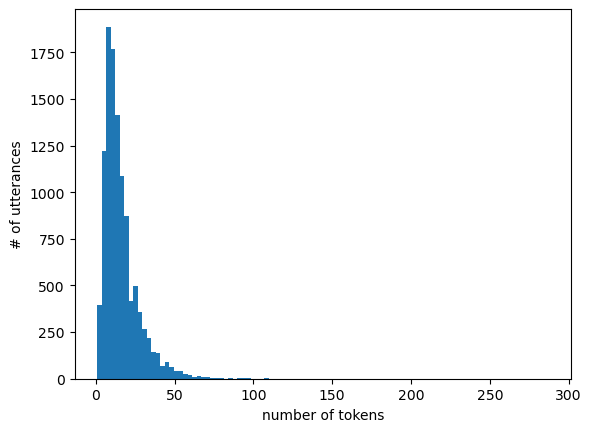

In [3]:
# Visualize utterance lengths distribution data in the array utterance_lengths in a bar chart 
plt.hist(utterance_lengths,  bins=100)
plt.xlabel('number of tokens')
plt.ylabel('# of utterances')

plt.show()

In [8]:
tmp_ = 0

for i in utterance_lengths:
    if i >= 75:
        tmp_ += 1
        print(i, end=" ")

print(f'\n개수: {tmp_}')

109 89 104 109 81 163 195 98 112 77 81 91 97 109 97 93 90 287 95 83 145 86 76 98 75 79 81 156 86 96 
개수: 30
